In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
df = pd.concat([X, y], axis=1) #creating the dataframe from the features and observed output

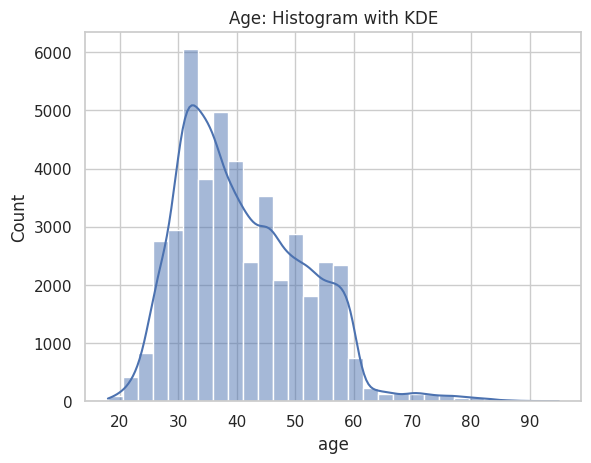

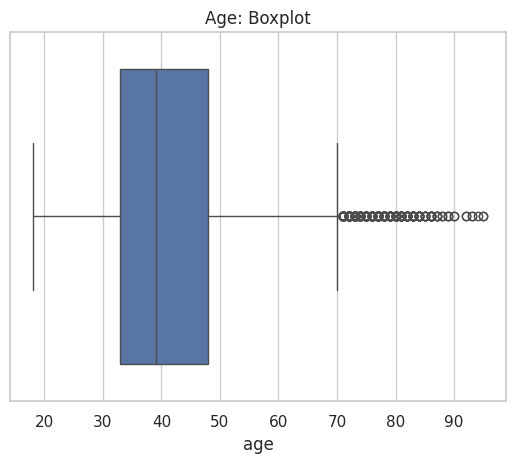

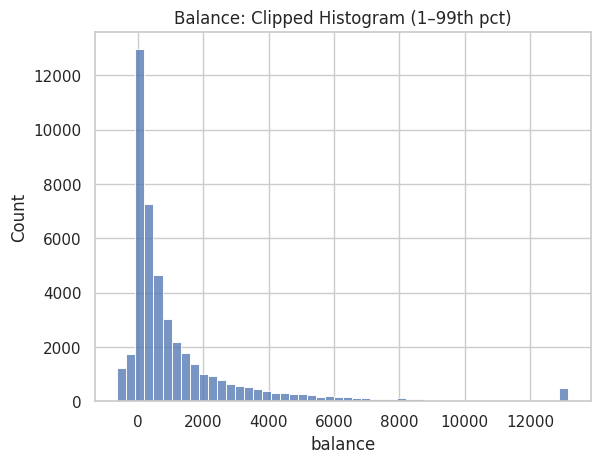

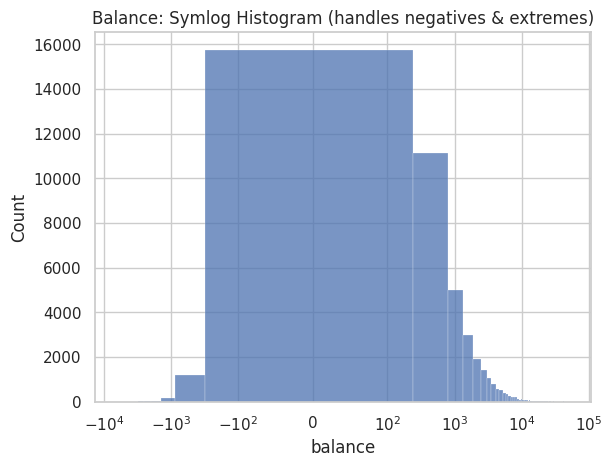

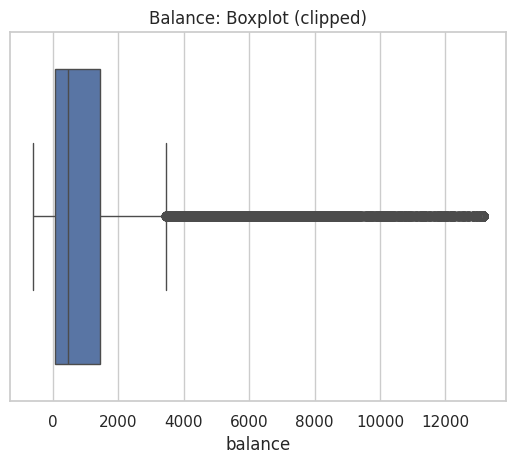

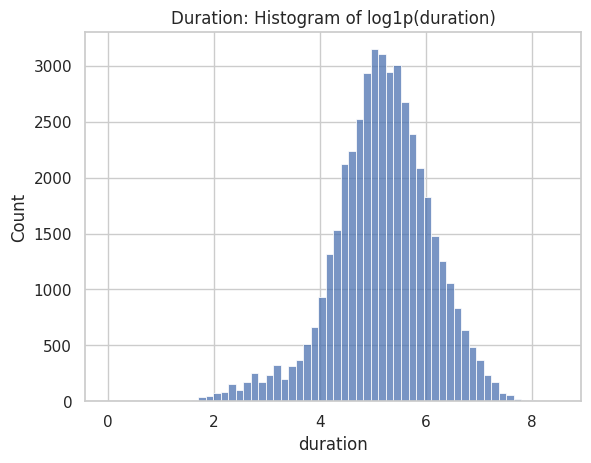

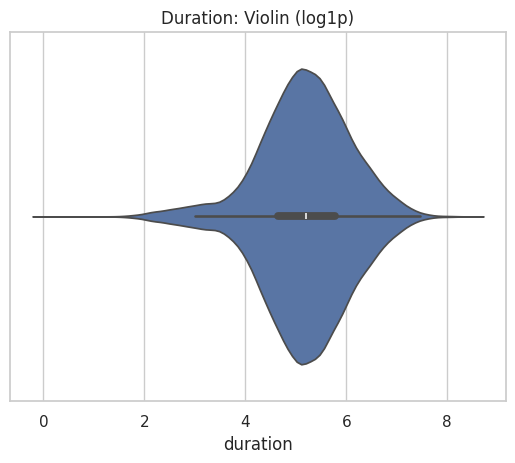

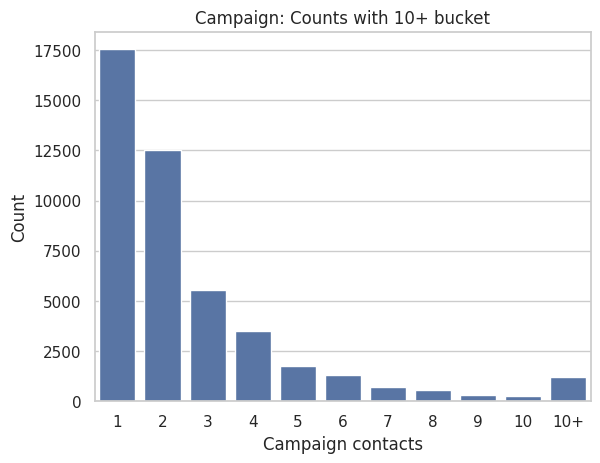

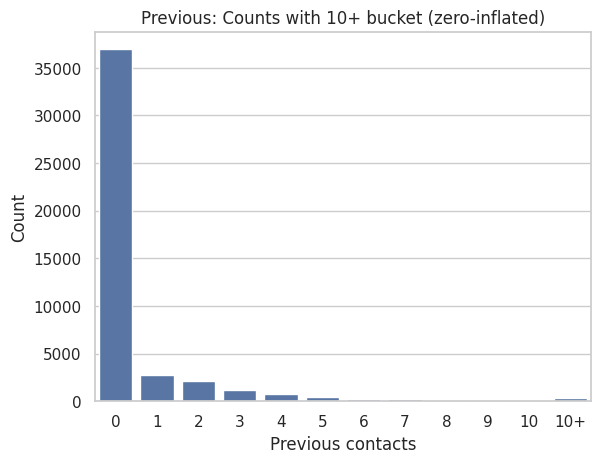

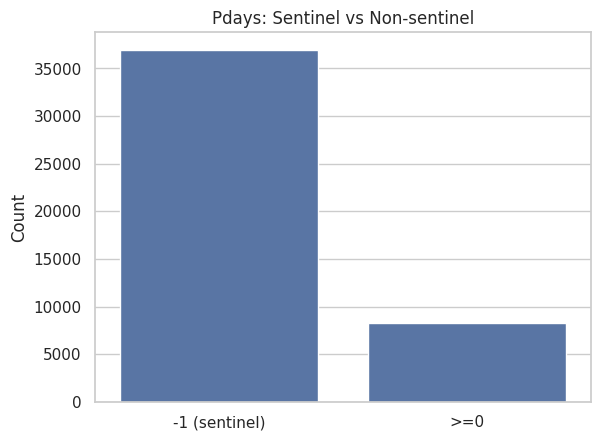

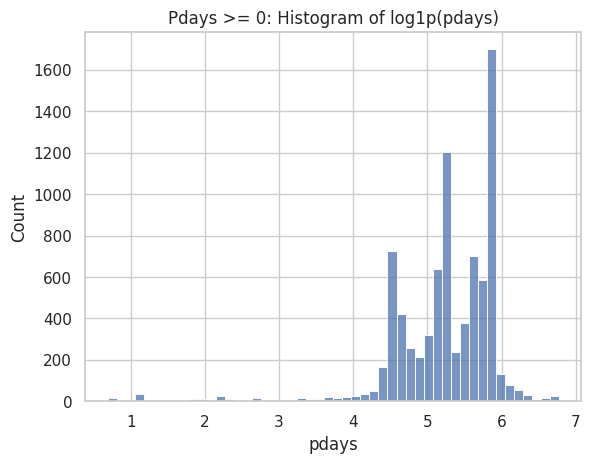

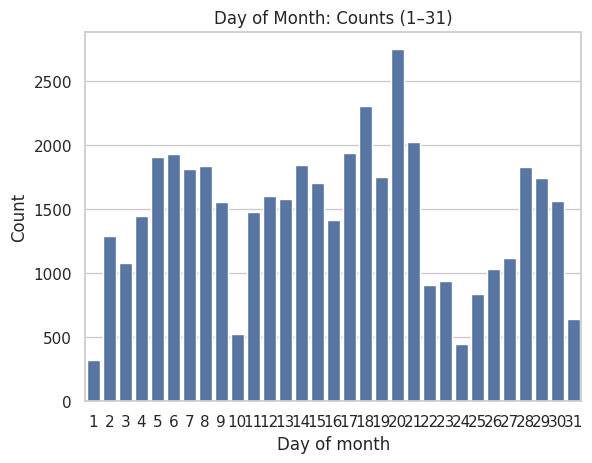

In [5]:



sns.set(style="whitegrid")


sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age: Histogram with KDE')
plt.show()

sns.boxplot(x=df['age'])
plt.title('Age: Boxplot')
plt.show()


q1, q99 = df['balance'].quantile([0.01, 0.99])
balance_clipped = df['balance'].clip(lower=q1, upper=q99)
sns.histplot(balance_clipped, bins=50)
plt.title('Balance: Clipped Histogram (1–99th pct)')
plt.show()

plt.figure()
sns.histplot(df['balance'], bins=200)
plt.xscale('symlog', linthresh=100)
plt.title('Balance: Symlog Histogram (handles negatives & extremes)')
plt.show()

sns.boxplot(x=balance_clipped)
plt.title('Balance: Boxplot (clipped)')
plt.show()


sns.histplot(np.log1p(df['duration']), bins=60)
plt.title('Duration: Histogram of log1p(duration)')
plt.show()

sns.violinplot(x=np.log1p(df['duration']))
plt.title('Duration: Violin (log1p)')
plt.show()


camp = df['campaign'].copy()
camp_bucket = camp.where(camp <= 10, other=11)  # 11 represents "10+"
label_map = {**{i: str(i) for i in range(0, 11)}, 11: '10+'}
counts = camp_bucket.map(label_map).value_counts().sort_index(key=lambda s: s.map({**{str(i): i for i in range(0,11)}, '10+': 11}))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Campaign: Counts with 10+ bucket')
plt.xlabel('Campaign contacts')
plt.ylabel('Count')
plt.show()


prev = df['previous'].copy()
prev_bucket = prev.where(prev <= 10, other=11)
label_map_prev = {**{i: str(i) for i in range(0, 11)}, 11: '10+'}
counts_prev = prev_bucket.map(label_map_prev).value_counts().sort_index(key=lambda s: s.map({**{str(i): i for i in range(0,11)}, '10+': 11}))
sns.barplot(x=counts_prev.index, y=counts_prev.values)
plt.title('Previous: Counts with 10+ bucket (zero-inflated)')
plt.xlabel('Previous contacts')
plt.ylabel('Count')
plt.show()


pdays = df['pdays']
sentinel_mask = (pdays == -1)
sns.barplot(x=['-1 (sentinel)', '>=0'], y=[sentinel_mask.sum(), (~sentinel_mask).sum()])
plt.title('Pdays: Sentinel vs Non-sentinel')
plt.ylabel('Count')
plt.show()

sns.histplot(np.log1p(pdays[~sentinel_mask]), bins=50)
plt.title('Pdays >= 0: Histogram of log1p(pdays)')
plt.show()


dom = df['day_of_week'].astype(int)
order = list(range(1, 32))
sns.countplot(x=dom, order=order)
plt.title('Day of Month: Counts (1–31)')
plt.xlabel('Day of month')
plt.ylabel('Count')
plt.show()


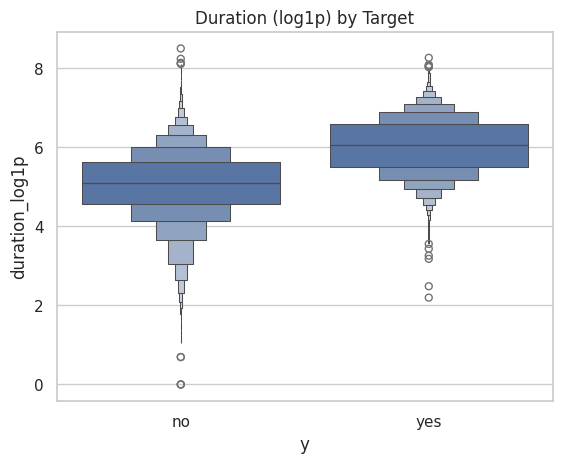

/tmp/ipython-input-1791512652.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby('campaign_bucket')['y_bin'].mean().reset_index()


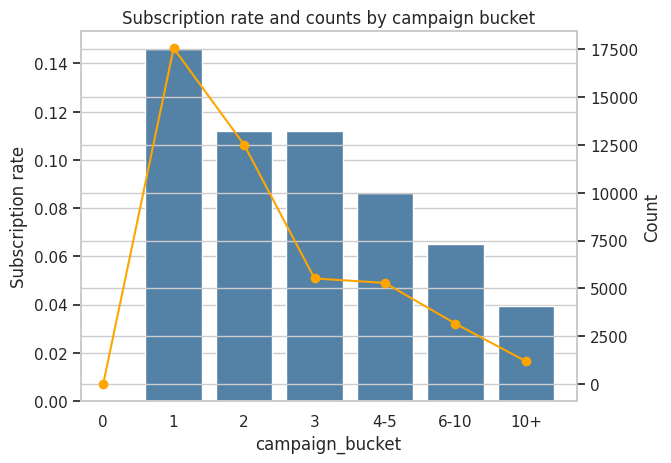

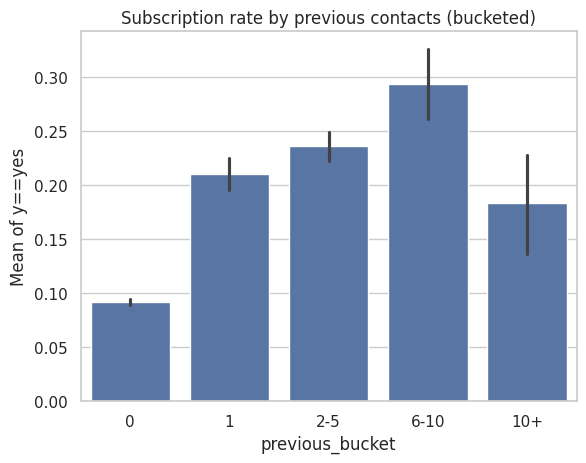

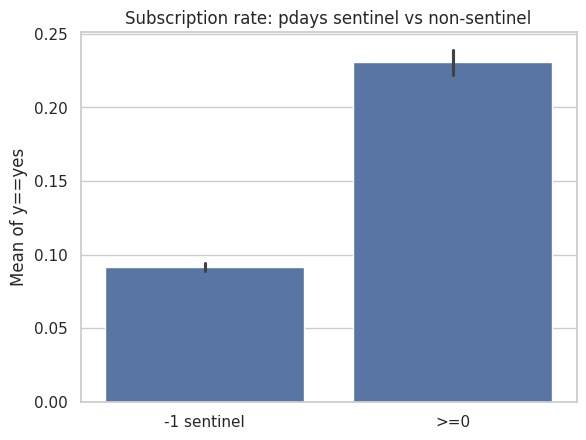

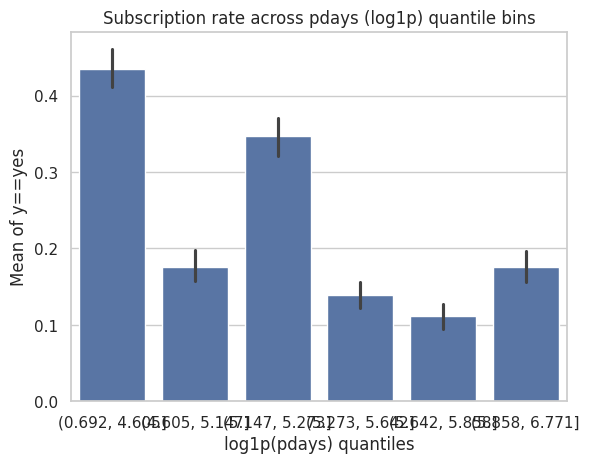

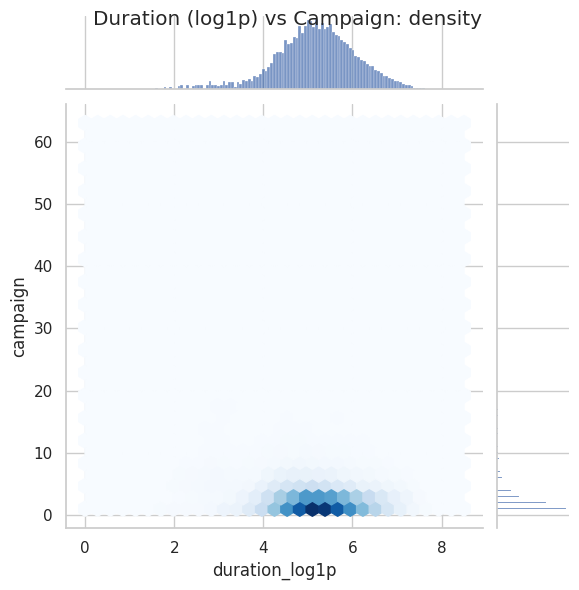

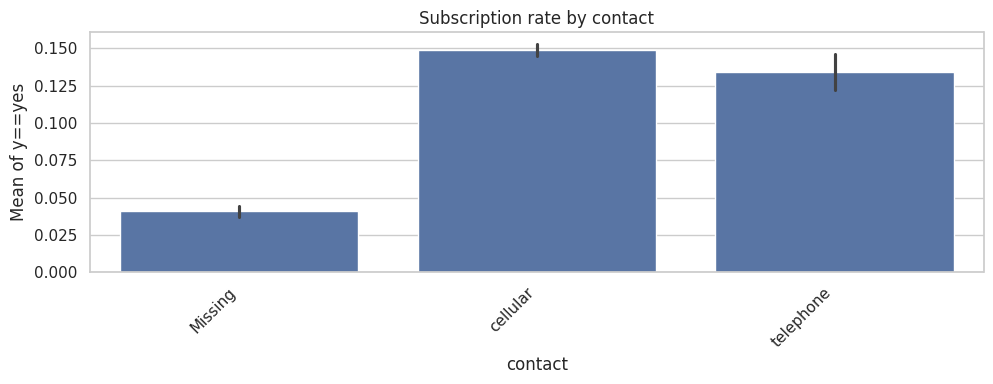

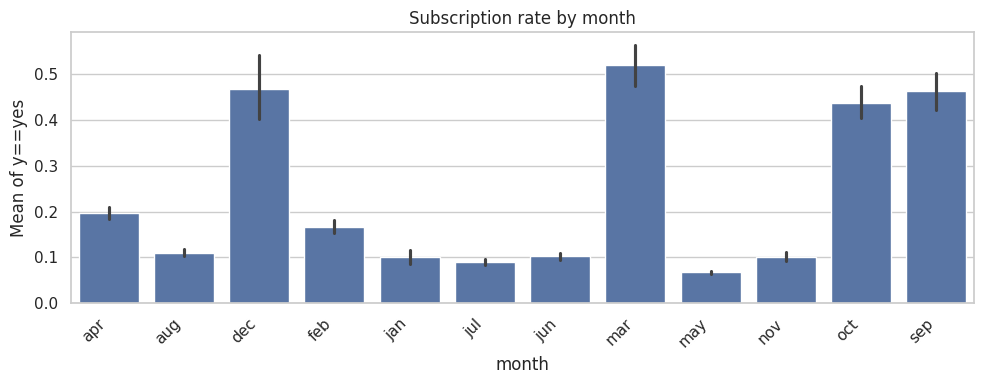

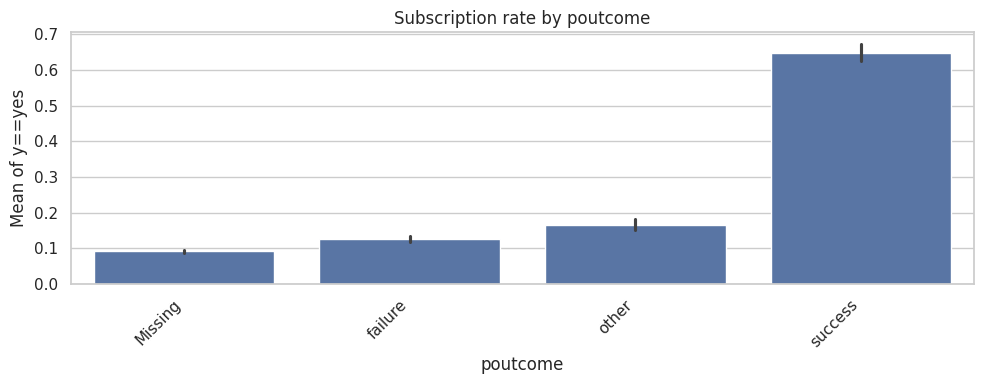

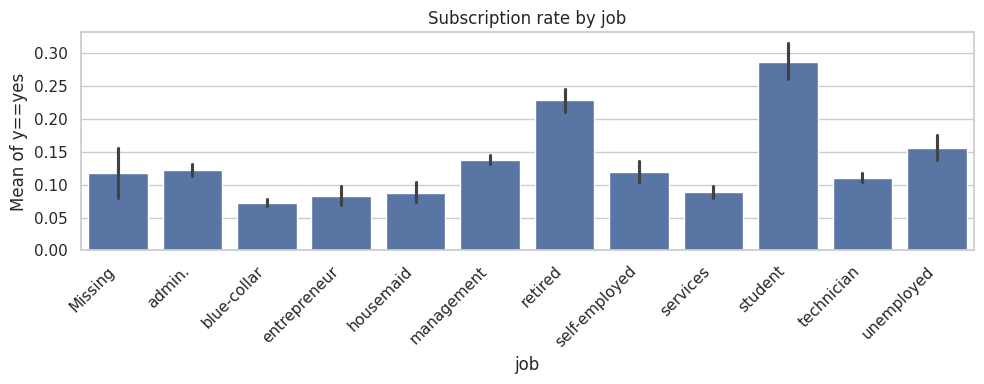

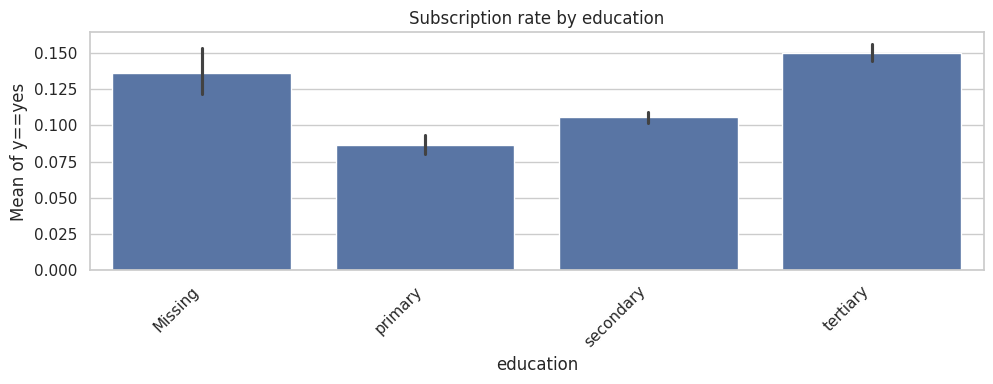

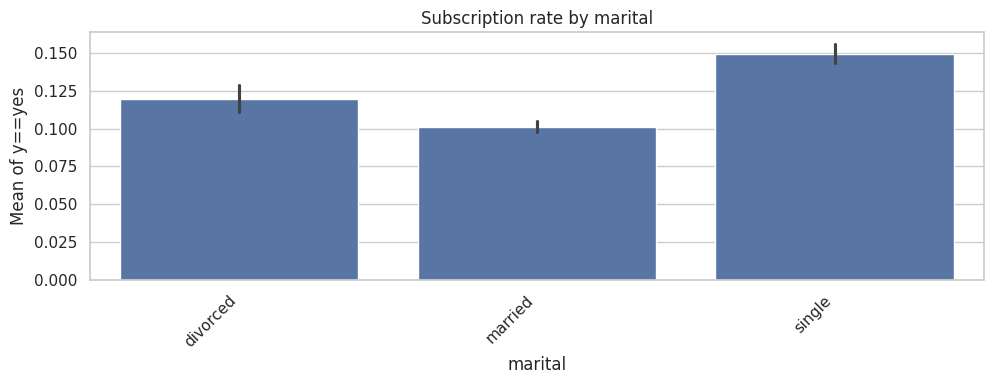

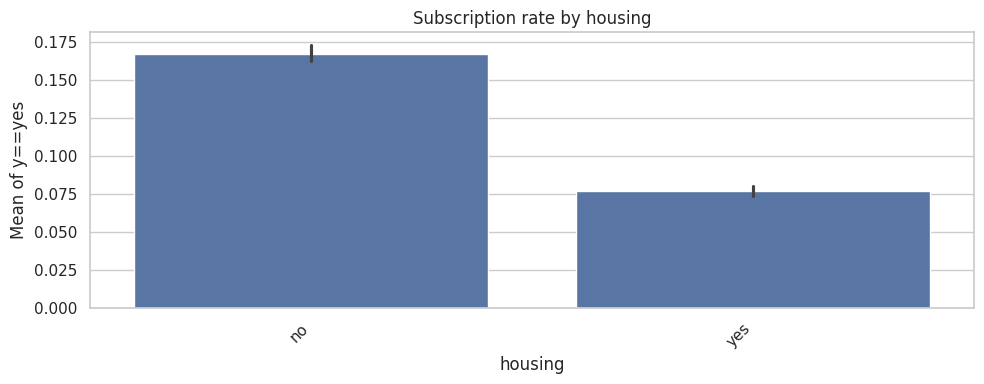

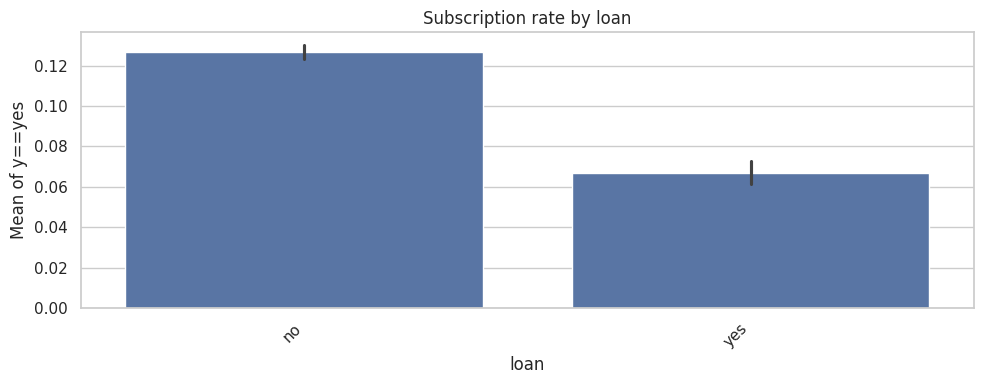

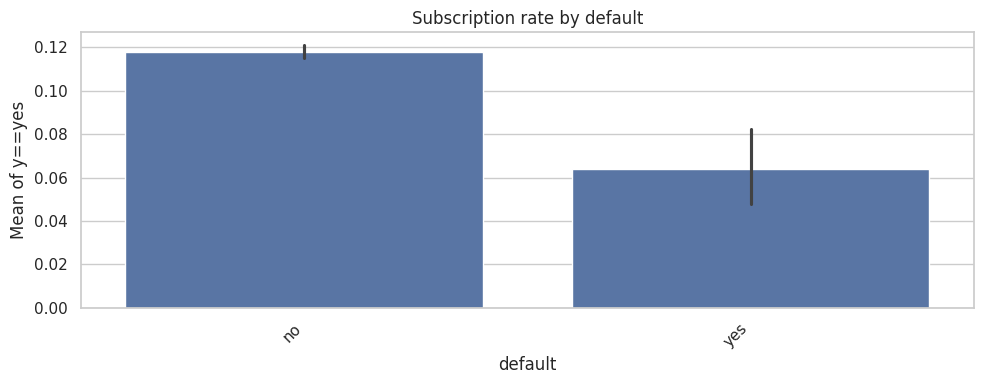

                age   balance  duration  campaign  pdays_pos  previous  \
age        1.000000  0.096380 -0.033257  0.037136  -0.017468 -0.011900   
balance    0.096380  1.000000  0.042651 -0.030959   0.069676  0.079536   
duration  -0.033257  0.042651  1.000000 -0.107962   0.028698  0.031175   
campaign   0.037136 -0.030959 -0.107962  1.000000  -0.112284 -0.108448   
pdays_pos -0.017468  0.069676  0.028698 -0.112284   1.000000  0.985645   
previous  -0.011900  0.079536  0.031175 -0.108448   0.985645  1.000000   
y_bin     -0.008750  0.100295  0.342469 -0.084054   0.154055  0.169124   

              y_bin  
age       -0.008750  
balance    0.100295  
duration   0.342469  
campaign  -0.084054  
pdays_pos  0.154055  
previous   0.169124  
y_bin      1.000000  


In [6]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid")


df['y_bin'] = (df['y'].str.lower() == 'yes').astype(int)
df['pdays_sentinel'] = (df['pdays'] == -1).astype(int)
df['pdays_pos'] = df['pdays'].clip(lower=0)
df['duration_log1p'] = np.log1p(df['duration'])
df['balance_log1p_signed'] = np.sign(df['balance']) * np.log1p(np.abs(df['balance']))
df['campaign_bucket'] = pd.cut(df['campaign'], bins=[-0.5,0.5,1.5,2.5,3.5,5.5,10.5, 1e9],
                               labels=['0','1','2','3','4-5','6-10','10+'])
df['previous_bucket'] = pd.cut(df['previous'], bins=[-0.5,0.5,1.5,5.5,10.5, 1e9],
                               labels=['0','1','2-5','6-10','10+'])
df['day_of_month'] = df['day_of_week']


sns.boxenplot(x='y', y='duration_log1p', data=df, order=['no','yes'])
plt.title('Duration (log1p) by Target')
plt.show()


rate = df.groupby('campaign_bucket')['y_bin'].mean().reset_index()
cnt = df['campaign_bucket'].value_counts().reindex(rate['campaign_bucket']).reset_index()
fig, ax1 = plt.subplots()
sns.barplot(x='campaign_bucket', y='y_bin', data=rate, color='steelblue', ax=ax1)
ax1.set_ylabel('Subscription rate')
ax2 = ax1.twinx()
ax2.plot(cnt['campaign_bucket'], cnt['count'], color='orange', marker='o')
ax2.set_ylabel('Count')
ax1.set_title('Subscription rate and counts by campaign bucket')
plt.show()


sns.barplot(x='previous_bucket', y='y_bin', data=df, estimator=np.mean, order=['0','1','2-5','6-10','10+'])
plt.title('Subscription rate by previous contacts (bucketed)')
plt.ylabel('Mean of y==yes')
plt.show()


sns.barplot(x=df['pdays_sentinel'].map({1:'-1 sentinel',0:'>=0'}), y='y_bin', data=df, estimator=np.mean)
plt.title('Subscription rate: pdays sentinel vs non-sentinel')
plt.ylabel('Mean of y==yes')
plt.xlabel('')
plt.show()


df_non = df[df['pdays'] >= 0].copy()
df_non['pdays_bin'] = pd.qcut(np.log1p(df_non['pdays_pos']), q=6, duplicates='drop')
sns.barplot(x='pdays_bin', y='y_bin', data=df_non, estimator=np.mean)
plt.title('Subscription rate across pdays (log1p) quantile bins')
plt.ylabel('Mean of y==yes')
plt.xlabel('log1p(pdays) quantiles')
plt.show()


g = sns.jointplot(
    data=df, x='duration_log1p', y='campaign', kind='hex', gridsize=30, cmap='Blues'
)
g.fig.suptitle('Duration (log1p) vs Campaign: density')
plt.show()


for col in ['contact','month','poutcome','job','education','marital','housing','loan','default']:
    tmp = df.copy()
    tmp[col] = tmp[col].fillna('Missing')
    plt.figure(figsize=(10,4))
    sns.barplot(x=col, y='y_bin', data=tmp, estimator=np.mean, order=sorted(tmp[col].unique()))
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Subscription rate by {col}')
    plt.ylabel('Mean of y==yes')
    plt.tight_layout(); plt.show()


num_cols = ['age','balance','duration','campaign','pdays_pos','previous']
corr = df[num_cols + ['y_bin']].corr(method='spearman')
print(corr)


In [7]:
import numpy as np
import pandas as pd


df = df.copy()


df = df.loc[:, ~df.columns.duplicated()]


if 'day_of_week' in df.columns and 'day_of_month' not in df.columns:
    df = df.rename(columns={'day_of_week': 'day_of_month'})
elif 'day' in df.columns and 'day_of_month' not in df.columns:
    df = df.rename(columns={'day': 'day_of_month'})


if 'day_of_month' in df.columns:
    col = df['day_of_month']
    if isinstance(col, pd.DataFrame):
        col = col.iloc[:, 0]
    df['day_of_month'] = pd.to_numeric(col, errors='coerce')


df['y_bin'] = (df['y'].str.lower() == 'yes').astype(int)


df['pdays_sentinel'] = (df['pdays'] == -1).astype(int)
df['pdays_pos'] = df['pdays'].clip(lower=0)


cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('object').fillna('Missing')


num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays_pos', 'previous', 'day_of_month']
for c in num_cols:
    if c in df.columns:
        col = df[c]
        if isinstance(col, pd.DataFrame):
            col = col.iloc[:, 0]
        df[c] = pd.to_numeric(col, errors='coerce')


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


safe_num = ['age','balance','campaign','previous','pdays_pos','day_of_month']
safe_bin = ['pdays_sentinel']
safe_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome',

           ]


def make_preprocessor(num_cols, cat_cols, passthrough_cols=None):
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    transformers = [
        ('num', num_imputer, num_cols),
        ('cat', Pipeline([('imp', cat_imputer), ('ohe', ohe)]), cat_cols),
    ]
    if passthrough_cols:
        transformers.append(('pass', 'passthrough', passthrough_cols))
    return ColumnTransformer(transformers=transformers, remainder='drop')




In [9]:

df['duration_log1p'] = np.log1p(df['duration'])
df['balance_log1p_signed'] = np.sign(df['balance']) * np.log1p(np.abs(df['balance']))


df['campaign_bucket'] = pd.cut(df['campaign'],
                               bins=[-0.5,0.5,1.5,2.5,3.5,5.5,10.5, np.inf],
                               labels=['0','1','2','3','4-5','6-10','10+'])
df['previous_bucket'] = pd.cut(df['previous'],
                               bins=[-0.5,0.5,1.5,5.5,10.5, np.inf],
                               labels=['0','1','2-5','6-10','10+'])


df['contacts_total'] = df['campaign'] + df['previous']
df['duration_per_contact'] = df['duration'] / (df['campaign'] + 1)


age_bins = [-np.inf, 29, 39, 49, 59, np.inf]
age_labels = ['<30','30-39','40-49','50-59','60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

df['spending_level'] = pd.qcut(df['balance'], q=[0,.2,.4,.6,.8,1.0], duplicates='drop',
                               labels=['Q1','Q2','Q3','Q4','Q5'])


cat_cols_extended = ['job','marital','education','default','housing','loan','contact','month','poutcome',
                     'campaign_bucket','previous_bucket','age_group','spending_level']
for c in cat_cols_extended:
    df[c] = df[c].astype('object').fillna('Missing')


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import sklearn


def make_preprocessor(num_cols, cat_cols, passthrough_cols=None):
    """Create preprocessing pipeline for numeric, categorical, and passthrough columns."""
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')


    if sklearn.__version__ >= '1.4':
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    else:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

    transformers = [
        ('num', num_imputer, num_cols),
        ('cat', Pipeline([
            ('imputer', cat_imputer),
            ('encoder', ohe)
        ]), cat_cols)
    ]

    if passthrough_cols:
        transformers.append(('pass', 'passthrough', passthrough_cols))

    preprocessor = ColumnTransformer(transformers)
    return preprocessor



safe_numeric = ['age', 'balance', 'campaign', 'previous', 'pdays_pos', 'day_of_month', 'contacts_total']
safe_binary = ['pdays_sentinel']
safe_cats = cat_cols_extended

full_numeric = safe_numeric + ['duration', 'duration_log1p', 'balance_log1p_signed', 'duration_per_contact']
full_binary = safe_binary
full_cats = cat_cols_extended


y = df['y_bin']


pre_safe = make_preprocessor(num_cols=safe_numeric, cat_cols=safe_cats, passthrough_cols=safe_binary)
pre_full = make_preprocessor(num_cols=full_numeric, cat_cols=full_cats, passthrough_cols=full_binary)


def make_splits(X, y, seed=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=seed)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_safe = df[safe_numeric + safe_binary + safe_cats]
X_full = df[full_numeric + full_binary + full_cats]

X_safe_train, X_safe_val, X_safe_test, y_train, y_val, y_test = make_splits(X_safe, y)
X_full_train, X_full_val, X_full_test, _, _, _ = make_splits(X_full, y)


pre_safe.fit(X_safe_train)
pre_full.fit(X_full_train)


print({
    'baseline_train': y_train.mean(),
    'baseline_val': y_val.mean(),
    'baseline_test': y_test.mean()
})


{'baseline_train': np.float64(0.11697791259835055), 'baseline_val': np.float64(0.11707460925980537), 'baseline_test': np.float64(0.11692716012975524)}


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score


clf_gini = Pipeline(steps=[
    ('prep', pre_safe),
    ('model', DecisionTreeClassifier(
        criterion='gini',
        class_weight='balanced',
        min_samples_leaf=10,
        min_samples_split=20,
        random_state=42
    ))
])


clf_gini.fit(X_safe_train, y_train)
for name, X, y in [('VAL', X_safe_val, y_val), ('TEST', X_safe_test, y_test)]:
    y_prob = clf_gini.predict_proba(X)[:, 1]
    y_pred = clf_gini.predict(X)
    print(f'[{name}] ROC AUC:', roc_auc_score(y, y_prob))
    print(f'[{name}] PR AUC:', average_precision_score(y, y_prob))


[VAL] ROC AUC: 0.7213473967245996
[VAL] PR AUC: 0.33194087847916376
[TEST] ROC AUC: 0.7139311941586057
[TEST] PR AUC: 0.33877403539026885


In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score


Xtr_prepared = pre_safe.fit_transform(X_safe_train)
base = DecisionTreeClassifier(criterion='gini',
                              class_weight='balanced',
                              random_state=42)
path = base.cost_complexity_pruning_path(Xtr_prepared, y_train)
ccp_alphas = path.ccp_alphas[:-1]

if ccp_alphas.size == 0:
    ccp_grid = [0.0]
else:
    qs = np.unique(np.quantile(ccp_alphas, np.linspace(0, 0.9, 12)))
    ccp_grid = np.unique(np.r_[0.0, qs])


pipe = Pipeline(steps=[
    ('prep', pre_safe),
    ('clf', DecisionTreeClassifier(
        criterion='gini',
        class_weight='balanced',
        random_state=42
    ))
])

param_grid = {
    'clf__max_depth': [None, 4, 6, 8, 10],
    'clf__min_samples_split': [10, 20, 40],
    'clf__ccp_alpha': ccp_grid
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    refit=True
)

grid.fit(X_safe_train, y_train)
print('Best params:', grid.best_params_)
print('Best CV ROC AUC:', grid.best_score_)


best = grid.best_estimator_
for name, X, y in [('VAL', X_safe_val, y_val), ('TEST', X_safe_test, y_test)]:
    y_prob = best.predict_proba(X)[:, 1]
    print(f'[{name}] ROC AUC:', roc_auc_score(y, y_prob))
    print(f'[{name}] PR AUC:', average_precision_score(y, y_prob))


Best params: {'clf__ccp_alpha': np.float64(0.00016686789104638532), 'clf__max_depth': 10, 'clf__min_samples_split': 40}
Best CV ROC AUC: 0.7655419360241804
[VAL] ROC AUC: 0.7626656545669005
[VAL] PR AUC: 0.39393661174630046
[TEST] ROC AUC: 0.7630004524899263
[TEST] PR AUC: 0.4008164734200761


In [13]:
from sklearn.metrics import accuracy_score

def eval_overfit(model, X_tr, y_tr, X_val, y_val, X_te, y_te, label='MODEL'):
    # Predictions
    y_tr_pred  = model.predict(X_tr)
    y_val_pred = model.predict(X_val)
    y_te_pred  = model.predict(X_te)

    # Accuracies
    acc_tr  = accuracy_score(y_tr, y_tr_pred)
    acc_val = accuracy_score(y_val, y_val_pred)
    acc_te  = accuracy_score(y_te, y_te_pred)


    gap_val = acc_tr - acc_val
    gap_te  = acc_tr - acc_te

    print(f'\n[{label}]')
    print(f'Train accuracy: {acc_tr:.4f}')
    print(f'Valid accuracy: {acc_val:.4f}  (train–val gap: {gap_val:+.4f})')
    print(f'Test  accuracy: {acc_te:.4f}  (train–test gap: {gap_te:+.4f})')


    if acc_tr > 0.95 and acc_te < acc_tr - 0.05:
        print('Hint: likely overfitting (very high train, noticeably lower test).')
    elif acc_tr < 0.70 and acc_te < 0.70:
        print('Hint: likely underfitting (both train and test low).')
    else:
        print('Hint: bias–variance tradeoff looks reasonable.')


try:
    eval_overfit(safe_tree, X_safe_train, y_train, X_safe_val, y_val, X_safe_test, y_test, label='BASELINE_SAFE')
except NameError:
    pass


try:
    best = grid.best_estimator_
    eval_overfit(best, X_safe_train, y_train, X_safe_val, y_val, X_safe_test, y_test, label='TUNED_SAFE')
except NameError:
    pass


try:
    eval_overfit(full_tree, X_full_train, y_train, X_full_val, y_val, X_full_test, y_test, label='BASELINE_FULL')
except NameError:
    pass



[TUNED_SAFE]
Train accuracy: 0.7786
Valid accuracy: 0.7740  (train–val gap: +0.0046)
Test  accuracy: 0.7710  (train–test gap: +0.0075)
Hint: bias–variance tradeoff looks reasonable.


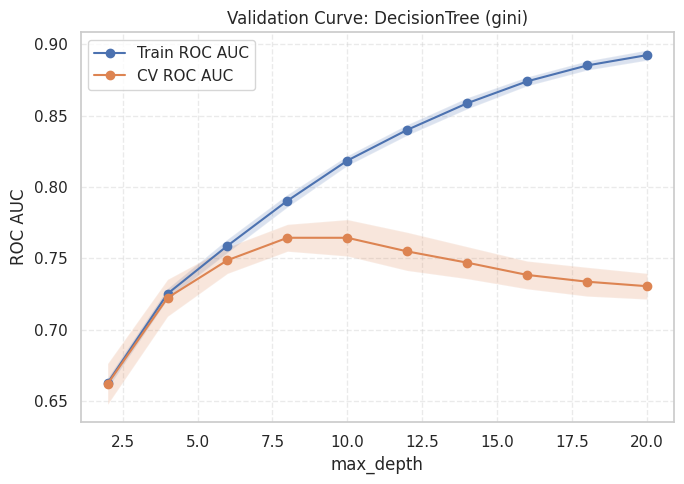

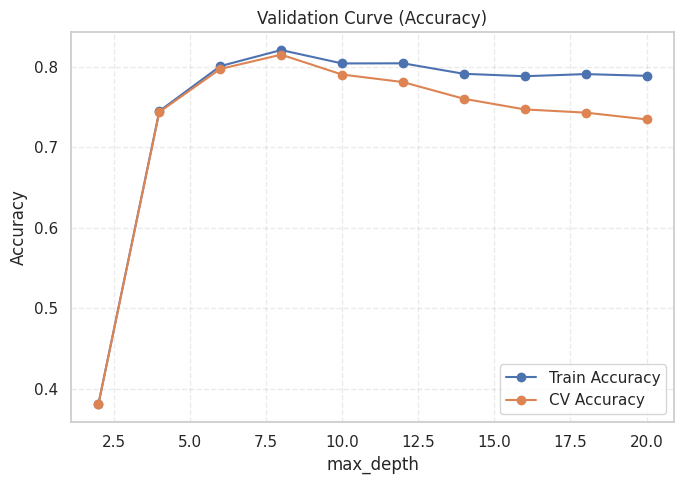

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


best_min_samples_split = 40
best_ccp_alpha = 0.0001672167806536987
param_range = np.arange(2, 21, 2)

pipe = Pipeline(steps=[
    ('prep', pre_safe),
    ('clf', DecisionTreeClassifier(
        criterion='gini',
        class_weight='balanced',
        min_samples_split=best_min_samples_split,
        ccp_alpha=best_ccp_alpha,
        random_state=42
    ))
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_scores, val_scores = validation_curve(
    estimator=pipe,
    X=X_safe_train, y=y_train,
    param_name='clf__max_depth',
    param_range=param_range,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(7,5))
plt.plot(param_range, train_mean, marker='o', label='Train ROC AUC')
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.plot(param_range, val_mean, marker='o', label='CV ROC AUC')
plt.fill_between(param_range, val_mean-val_std, val_mean+val_std, alpha=0.2)
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Validation Curve: DecisionTree (gini)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


train_scores_acc, val_scores_acc = validation_curve(
    estimator=pipe,
    X=X_safe_train, y=y_train,
    param_name='clf__max_depth',
    param_range=param_range,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)

plt.figure(figsize=(7,5))
plt.plot(param_range, train_scores_acc.mean(axis=1), marker='o', label='Train Accuracy')
plt.plot(param_range, val_scores_acc.mean(axis=1), marker='o', label='CV Accuracy')
plt.xlabel('max_depth'); plt.ylabel('Accuracy'); plt.title('Validation Curve (Accuracy)')
plt.legend(); plt.grid(True, linestyle='--', alpha=0.4); plt.tight_layout(); plt.show()


In [15]:
import numpy as np, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from scipy.stats import randint, loguniform



def evaluate(pipe, X_tr, y_tr, X_va, y_va, label):
    pipe.fit(X_tr, y_tr)
    y_tr_pred = pipe.predict(X_tr); y_va_pred = pipe.predict(X_va)
    y_va_prob = pipe.predict_proba(X_va)[:,1]
    print(f'\n[{label}]')
    print('Train acc:', accuracy_score(y_tr, y_tr_pred))
    print('Val   acc:', accuracy_score(y_va, y_va_pred))
    print('Val ROC AUC:', roc_auc_score(y_va, y_va_prob))
    print('Val PR  AUC:', average_precision_score(y_va, y_va_prob))
    return pipe

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


tree_pipe = Pipeline([
    ('prep', pre_safe),
    ('clf', DecisionTreeClassifier(
        criterion='gini',
        class_weight='balanced',
        random_state=42
    ))
])


tree_param_dist = {
    'clf__max_depth': [None, 4, 6, 8, 10],
    'clf__min_samples_split': randint(5, 61),
    'clf__ccp_alpha': np.r_[0.0, loguniform(1e-5, 1e-2).rvs(1000)][:100]
}

tree_search = RandomizedSearchCV(
    estimator=tree_pipe,
    param_distributions=tree_param_dist,
    n_iter=40,
    scoring='roc_auc',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    refit=True
)
tree_search.fit(X_safe_train, y_train)
best_tree = tree_search.best_estimator_
_ = evaluate(best_tree, X_safe_train, y_train, X_safe_val, y_val, 'DecisionTree (random search)')
print('Best tree params:', tree_search.best_params_)



[DecisionTree (random search)]
Train acc: 0.8007710051505672
Val   acc: 0.8046299026835741
Val ROC AUC: 0.7717459478150255
Val PR  AUC: 0.3994677611566039
Best tree params: {'clf__ccp_alpha': np.float64(0.00044205942586643496), 'clf__max_depth': None, 'clf__min_samples_split': 28}


[GB-BASE] Val ROC AUC: 0.8050121022902228 PR AUC: 0.45753762176308116
Best GB params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05}
[VAL] ACC: 0.895, Precision: 0.632, Recall: 0.242, F1: 0.350, AUCPR: 0.464
[TEST] ACC: 0.898, Precision: 0.653, Recall: 0.271, F1: 0.383, AUCPR: 0.458


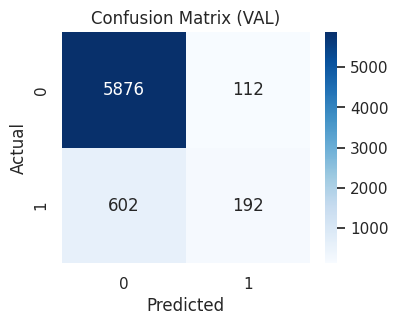

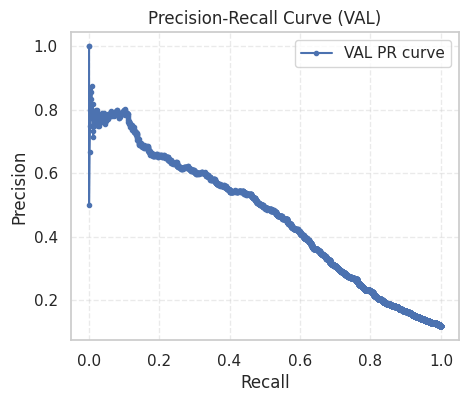

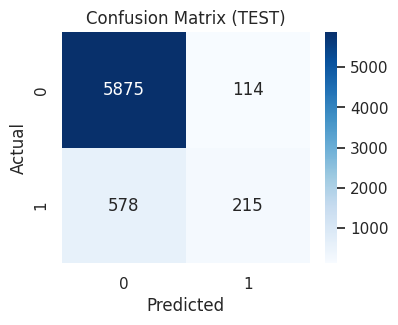

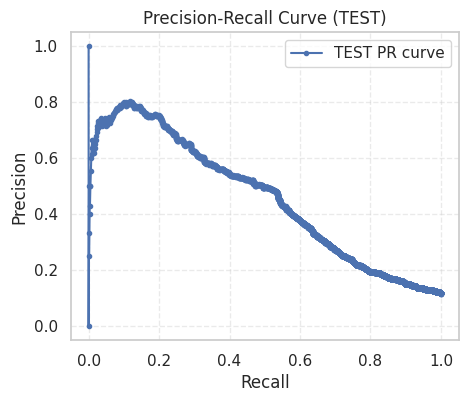

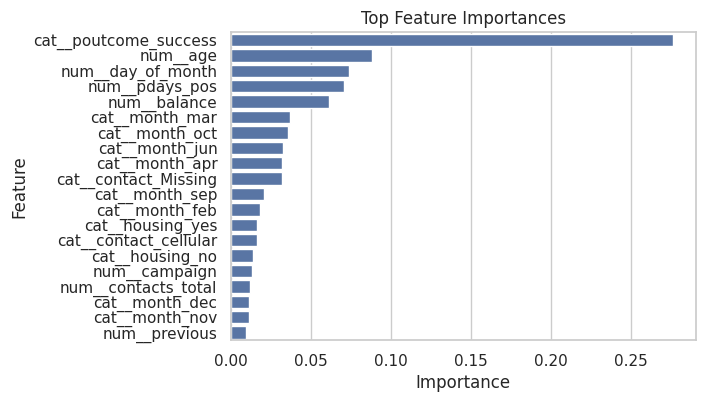

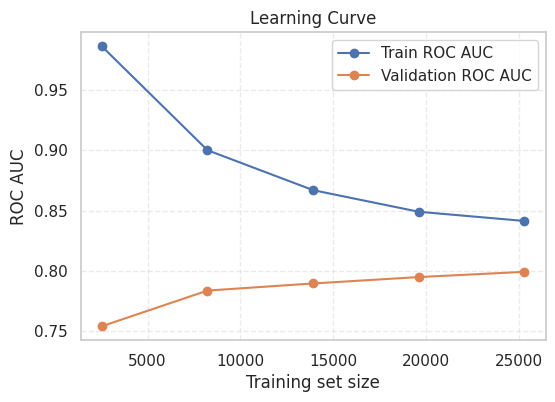

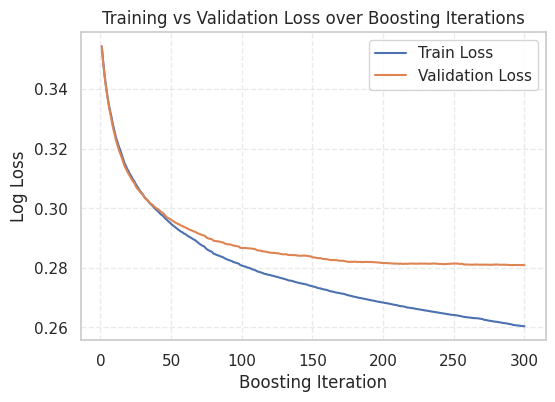

Learning Rate 0.01: Val ROC AUC=0.784, AUCPR=0.444
Learning Rate 0.1: Val ROC AUC=0.806, AUCPR=0.451
Learning Rate 0.3: Val ROC AUC=0.783, AUCPR=0.378


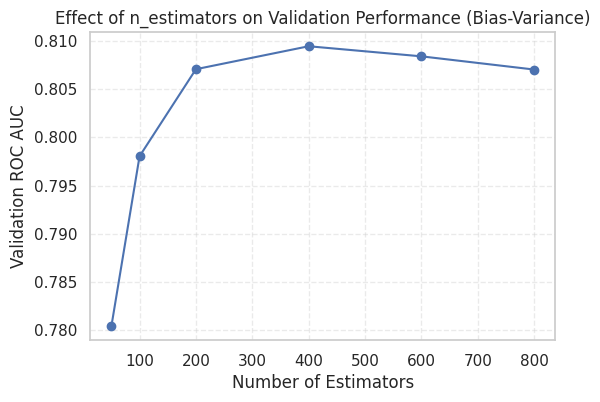

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, validation_curve, learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (roc_auc_score, average_precision_score, accuracy_score,
                             confusion_matrix, precision_recall_curve,
                             f1_score, precision_score, recall_score)

sns.set(style="whitegrid")




X_train_pre = pre_safe.fit_transform(X_safe_train)
X_val_pre   = pre_safe.transform(X_safe_val)
X_test_pre  = pre_safe.transform(X_safe_test)


if hasattr(pre_safe, 'get_feature_names_out'):
    feat_names = pre_safe.get_feature_names_out()
else:
    feat_names = X_safe_train.columns


gb_base = GradientBoostingClassifier(
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=300,
    max_depth=3,
    subsample=1.0,
    random_state=42
)
gb_base.fit(X_train_pre, y_train)
val_prob = gb_base.predict_proba(X_val_pre)[:,1]
print('[GB-BASE] Val ROC AUC:', roc_auc_score(y_val, val_prob),
      'PR AUC:', average_precision_score(y_val, val_prob))


param_distributions = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators':  [100, 300, 500],
    'max_depth':     [2, 3, 4],
    'subsample':     [1.0, 0.8, 0.6]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gb_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(loss='log_loss', random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    refit=True
)
gb_search.fit(X_train_pre, y_train)
best_gb = gb_search.best_estimator_
print('Best GB params:', gb_search.best_params_)


def eval_metrics(y_true, y_pred, y_prob, tag='VAL'):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auprc = average_precision_score(y_true, y_prob)
    print(f"[{tag}] ACC: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, AUCPR: {auprc:.3f}")
    return acc, prec, rec, f1, auprc

for tag, X, y in [('VAL', X_val_pre, y_val), ('TEST', X_test_pre, y_test)]:
    y_prob = best_gb.predict_proba(X)[:,1]
    y_pred = best_gb.predict(X)
    eval_metrics(y, y_pred, y_prob, tag)


def plot_confusion(y_true, y_pred, tag='VAL'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({tag})')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.show()

def plot_pr_curve(y_true, y_prob, tag='VAL'):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(recall, precision, marker='.', label=f'{tag} PR curve')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({tag})')
    plt.legend(); plt.grid(True, ls='--', alpha=0.4)
    plt.show()

for tag, X, y in [('VAL', X_val_pre, y_val), ('TEST', X_test_pre, y_test)]:
    y_pred = best_gb.predict(X)
    y_prob = best_gb.predict_proba(X)[:,1]
    plot_confusion(y, y_pred, tag)
    plot_pr_curve(y, y_prob, tag)


def plot_feature_importance(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:][::-1]
    plt.figure(figsize=(6,4))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
    plt.title('Top Feature Importances')
    plt.xlabel('Importance'); plt.ylabel('Feature')
    plt.show()

plot_feature_importance(best_gb, feat_names)


train_sizes, train_scores, val_scores = learning_curve(
    best_gb, X_train_pre, y_train,
    cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1,1.0,5)
)
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores.mean(axis=1), marker='o', label='Train ROC AUC')
plt.plot(train_sizes, val_scores.mean(axis=1), marker='o', label='Validation ROC AUC')
plt.xlabel('Training set size'); plt.ylabel('ROC AUC')
plt.title('Learning Curve')
plt.legend(); plt.grid(True, ls='--', alpha=0.4)
plt.show()


train_loss, val_loss = [], []
for y_train_pred in best_gb.staged_predict_proba(X_train_pre):
    train_loss.append(-np.mean(y_train*np.log(y_train_pred[:,1]) + (1-y_train)*np.log(1-y_train_pred[:,1])))
for y_val_pred in best_gb.staged_predict_proba(X_val_pre):
    val_loss.append(-np.mean(y_val*np.log(y_val_pred[:,1]) + (1-y_val)*np.log(1-y_val_pred[:,1])))

plt.figure(figsize=(6,4))
plt.plot(range(1, len(train_loss)+1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss)+1), val_loss, label='Validation Loss')
plt.xlabel('Boosting Iteration'); plt.ylabel('Log Loss')
plt.title('Training vs Validation Loss over Boosting Iterations')
plt.legend(); plt.grid(True, ls='--', alpha=0.4)
plt.show()


for lr in [0.01, 0.1, 0.3]:
    tmp_gb = GradientBoostingClassifier(
        learning_rate=lr,
        n_estimators=best_gb.n_estimators,
        max_depth=best_gb.max_depth,
        subsample=best_gb.subsample,
        random_state=42
    )
    tmp_gb.fit(X_train_pre, y_train)
    y_prob = tmp_gb.predict_proba(X_val_pre)[:,1]
    print(f'Learning Rate {lr}: Val ROC AUC={roc_auc_score(y_val, y_prob):.3f}, AUCPR={average_precision_score(y_val, y_prob):.3f}')


n_estimators_range = [50, 100, 200, 400, 600, 800]
val_aucs = []
for n in n_estimators_range:
    tmp_gb = GradientBoostingClassifier(
        learning_rate=best_gb.learning_rate,
        n_estimators=n,
        max_depth=best_gb.max_depth,
        subsample=best_gb.subsample,
        random_state=42
    )
    tmp_gb.fit(X_train_pre, y_train)
    y_prob = tmp_gb.predict_proba(X_val_pre)[:,1]
    val_aucs.append(roc_auc_score(y_val, y_prob))

plt.figure(figsize=(6,4))
plt.plot(n_estimators_range, val_aucs, marker='o')
plt.xlabel('Number of Estimators'); plt.ylabel('Validation ROC AUC')
plt.title('Effect of n_estimators on Validation Performance (Bias-Variance)')
plt.grid(True, ls='--', alpha=0.4)
plt.show()


[VAL] ACC=0.896 PREC=0.670 REC=0.225 F1=0.337 AUCPR=0.468 AUROC=0.806
[TEST] ACC=0.897 PREC=0.671 REC=0.235 F1=0.348 AUCPR=0.457 AUROC=0.793


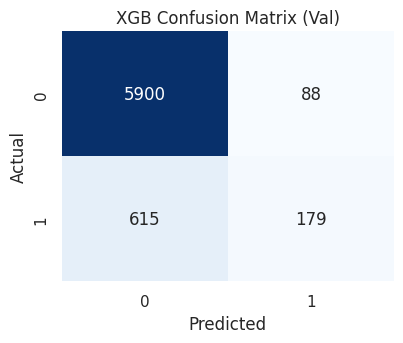

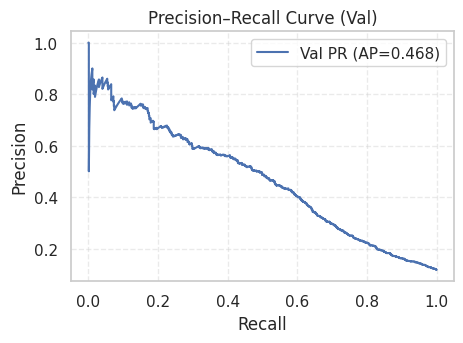

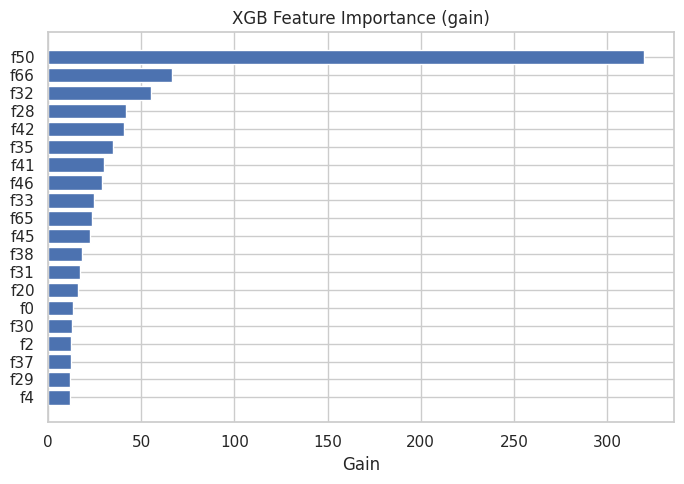

      lr  max_depth  best_iter  val_aucpr  test_aucpr   val_auc  test_auc
3   0.01          6        782   0.474880    0.470449  0.809704  0.797175
6   0.10          4        100   0.474630    0.462314  0.807448  0.794853
2   0.01          4       1240   0.472998    0.462750  0.808986  0.795421
1   0.01          3       1632   0.470488    0.458263  0.807548  0.793600
7   0.10          6        106   0.467680    0.467919  0.804566  0.794050
5   0.10          3        169   0.467607    0.456560  0.806300  0.792572
8   0.30          2         77   0.465824    0.444199  0.805365  0.787670
9   0.30          3         59   0.465448    0.450037  0.805180  0.794288
4   0.10          2        435   0.464264    0.458827  0.805045  0.794936
0   0.01          2       2614   0.462635    0.453154  0.804790  0.791905
11  0.30          6         20   0.460431    0.441406  0.798478  0.784573
10  0.30          4         41   0.460388    0.442203  0.804434  0.787533


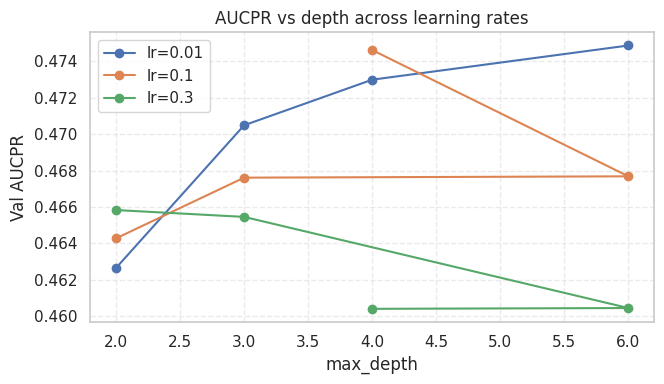

In [17]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve, average_precision_score, roc_auc_score
)
import xgboost as xgb

sns.set(style="whitegrid")


Xtr = pre_safe.fit_transform(X_safe_train, y_train)
Xva = pre_safe.transform(X_safe_val)
Xte = pre_safe.transform(X_safe_test)

dtrain = xgb.DMatrix(Xtr, label=y_train)
dval   = xgb.DMatrix(Xva, label=y_val)
dtest  = xgb.DMatrix(Xte, label=y_test)


params = {
    'objective': 'binary:logistic',
    'eval_metric': ['logloss','aucpr','auc'],
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1.0,
    'tree_method': 'hist'
}
evals = [(dtrain, 'train'), (dval, 'val')]
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=5000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=False
)
best_iteration = booster.best_iteration


def report(dmat, y_true, tag):
    prob = booster.predict(dmat, iteration_range=(0, best_iteration + 1))
    pred = (prob >= 0.5).astype(int)
    acc  = accuracy_score(y_true, pred)
    prec = precision_score(y_true, pred, zero_division=0)
    rec  = recall_score(y_true, pred, zero_division=0)
    f1   = f1_score(y_true, pred, zero_division=0)
    aucpr = average_precision_score(y_true, prob)
    auc   = roc_auc_score(y_true, prob)
    print(f'[{tag}] ACC={acc:.3f} PREC={prec:.3f} REC={rec:.3f} F1={f1:.3f} AUCPR={aucpr:.3f} AUROC={auc:.3f}')
    return prob, pred

vprob, vpred = report(dval, y_val, 'VAL')
tprob, tpred = report(dtest, y_test, 'TEST')


plt.figure(figsize=(4.2,3.6))
sns.heatmap(confusion_matrix(y_val, vpred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGB Confusion Matrix (Val)'); plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout(); plt.show()


prec, rec, _ = precision_recall_curve(y_val, vprob)
ap = average_precision_score(y_val, vprob)
plt.figure(figsize=(4.8,3.6))
plt.plot(rec, prec, label=f'Val PR (AP={ap:.3f})')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision–Recall Curve (Val)'); plt.legend()
plt.grid(True, ls='--', alpha=.4); plt.tight_layout(); plt.show()


imp = booster.get_score(importance_type='gain')
imp_df = pd.DataFrame({'feature': list(imp.keys()), 'gain': list(imp.values())}).sort_values('gain', ascending=False).head(20)
plt.figure(figsize=(7,5))
plt.barh(imp_df['feature'][::-1], imp_df['gain'][::-1])
plt.title('XGB Feature Importance (gain)'); plt.xlabel('Gain'); plt.tight_layout(); plt.show()


hist = booster.attributes()

try:
    results = booster.evals_result()
    train_loss = results['train']['logloss']
    val_loss   = results['val']['logloss']
except:

    print("Warning: Could not retrieve evaluation history")
    train_loss = []
    val_loss = []

if train_loss and val_loss:
    rounds = np.arange(1, len(train_loss)+1)
    plt.figure(figsize=(6.5,4.2))
    plt.plot(rounds, train_loss, label='Train logloss')
    plt.plot(rounds, val_loss,   label='Val logloss')
    plt.axvline(best_iteration + 1, color='k', ls='--', alpha=.6, label='best_iter')
    plt.xlabel('Boosting rounds'); plt.ylabel('Logloss'); plt.title('Training vs Validation Loss')
    plt.legend(); plt.grid(True, ls='--', alpha=.4); plt.tight_layout(); plt.show()


def run_cfg(lr, md, subs=0.8):
    p = params.copy(); p['eta'] = lr; p['max_depth'] = md; p['subsample'] = subs
    bst = xgb.train(p, dtrain, num_boost_round=5000, evals=evals, early_stopping_rounds=50, verbose_eval=False)
    best_iter_bst = bst.best_iteration
    vpr = bst.predict(dval,  iteration_range=(0, best_iter_bst + 1))
    tpr = bst.predict(dtest, iteration_range=(0, best_iter_bst + 1))
    return {
        'lr': lr, 'max_depth': md,
        'best_iter': best_iter_bst,
        'val_aucpr': average_precision_score(y_val, vpr),
        'test_aucpr': average_precision_score(y_test, tpr),
        'val_auc': roc_auc_score(y_val, vpr),
        'test_auc': roc_auc_score(y_test, tpr)
    }

grid = [run_cfg(lr, md) for lr in [0.01, 0.1, 0.3] for md in [2,3,4,6]]
df = pd.DataFrame(grid).sort_values(['val_aucpr','val_auc'], ascending=False)
print(df[['lr','max_depth','best_iter','val_aucpr','test_aucpr','val_auc','test_auc']])
plt.figure(figsize=(6.8,4))
for lr in sorted(df['lr'].unique()):
    s = df[df['lr']==lr]
    plt.plot(s['max_depth'], s['val_aucpr'], marker='o', label=f'lr={lr}')
plt.xlabel('max_depth'); plt.ylabel('Val AUCPR'); plt.title('AUCPR vs depth across learning rates')
plt.legend(); plt.grid(True, ls='--', alpha=.4); plt.tight_layout(); plt.show()


[XGB] Fit time: 2.87s  |  VAL AUCPR=0.468, AUROC=0.806, ACC=0.896  |  TEST AUCPR=0.457, AUROC=0.793, ACC=0.897


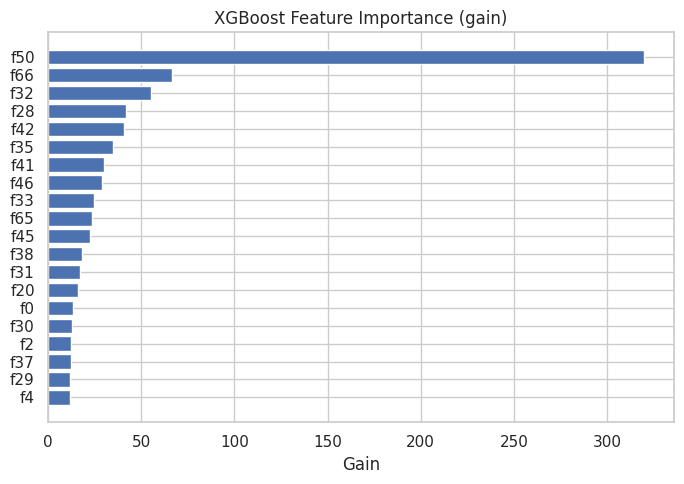

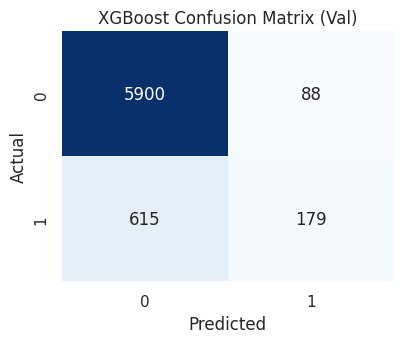

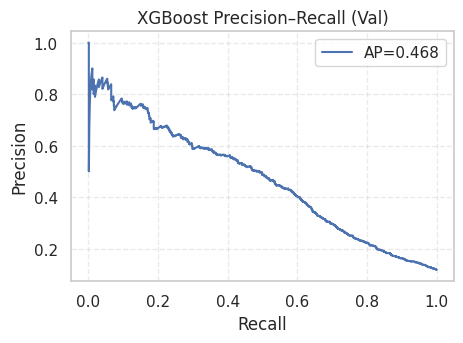

[LGBM] Fit time: 0.96s  |  VAL AUCPR=0.468, AUROC=0.806, ACC=0.895  |  TEST AUCPR=0.470, AUROC=0.798, ACC=0.898


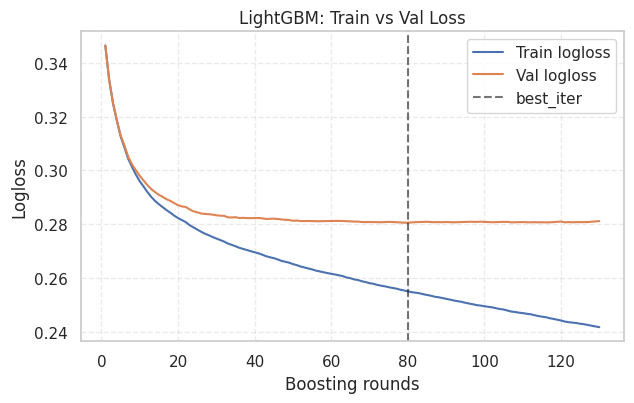

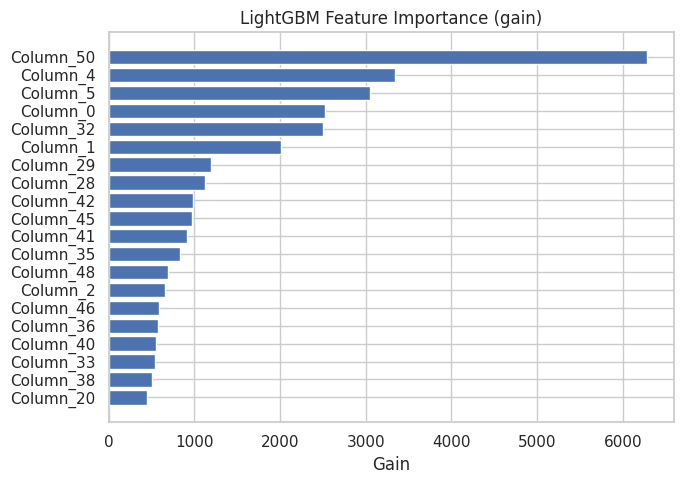

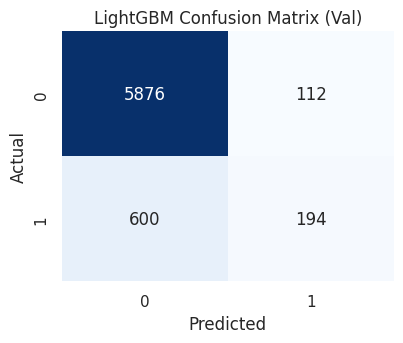

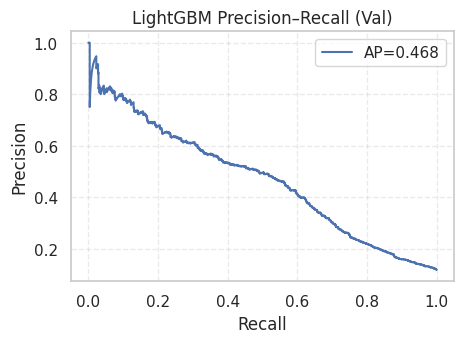


Hyperparameter Grid Search Results (Top configurations by AUCPR):
    lib    lr  depth  best_iter  val_aucpr  test_aucpr
7   lgb  0.01      6        986   0.474191    0.471731
13  lgb  0.10      4        172   0.472748    0.466267
3   lgb  0.01      3       2360   0.471650    0.463317
23  lgb  0.30      6         27   0.471430    0.455875
21  lgb  0.30      4         55   0.468761    0.452501
5   lgb  0.01      4       1631   0.468631    0.467714
11  lgb  0.10      3        317   0.467412    0.462164
15  lgb  0.10      6         76   0.467078    0.464983
19  lgb  0.30      3         64   0.466232    0.456841
9   lgb  0.10      2        554   0.465360    0.458534
1   lgb  0.01      2       4056   0.464440    0.459129
17  lgb  0.30      2        181   0.462576    0.454157


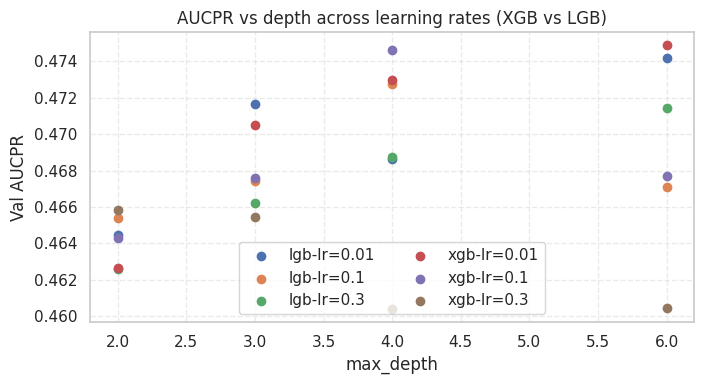

In [18]:


import time, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
import os
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve, average_precision_score, roc_auc_score
)
import xgboost as xgb
import lightgbm as lgb


warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

sns.set(style="whitegrid")


Xtr = pre_safe.fit_transform(X_safe_train, y_train)
Xva = pre_safe.transform(X_safe_val)
Xte = pre_safe.transform(X_safe_test)


def pr_metrics(y, prob, thr=0.5):
    pred = (prob >= thr).astype(int)
    return {
        'acc': accuracy_score(y, pred),
        'prec': precision_score(y, pred, zero_division=0),
        'rec': recall_score(y, pred, zero_division=0),
        'f1': f1_score(y, pred, zero_division=0),
        'aucpr': average_precision_score(y, prob),
        'auc': roc_auc_score(y, prob),
        'pred': pred
    }

def plot_confusion(y_true, y_pred, title):
    plt.figure(figsize=(4.2,3.6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title); plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()

def plot_pr_curve(y_true, prob, title):
    prec, rec, _ = precision_recall_curve(y_true, prob)
    ap = average_precision_score(y_true, prob)
    plt.figure(figsize=(4.8,3.6))
    plt.plot(rec, prec, label=f'AP={ap:.3f}')
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(title); plt.legend()
    plt.grid(True, ls='--', alpha=.4); plt.tight_layout(); plt.show()


dtrain = xgb.DMatrix(Xtr, label=y_train)
dval   = xgb.DMatrix(Xva, label=y_val)
dtest  = xgb.DMatrix(Xte, label=y_test)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': ['logloss','aucpr','auc'],
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1.0,
    'tree_method': 'hist'
}

t0 = time.time()
xgb_booster = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=5000,
    evals=[(dtrain,'train'),(dval,'val')],
    early_stopping_rounds=50,
    verbose_eval=False
)
xgb_time = time.time() - t0


best_round = getattr(xgb_booster, 'best_iteration', None)
iter_end = (best_round + 1) if best_round is not None else 0
def xgb_predict(bst, dmat, iter_end):
    try:
        return bst.predict(dmat, iteration_range=(0, iter_end)) if iter_end else bst.predict(dmat)
    except TypeError:
        bntl = getattr(bst, 'best_ntree_limit', None)
        return bst.predict(dmat, ntree_limit=bntl) if bntl is not None else bst.predict(dmat)

xgb_vprob = xgb_predict(xgb_booster, dval, iter_end)
xgb_tprob = xgb_predict(xgb_booster, dtest, iter_end)

xgb_val = pr_metrics(y_val, xgb_vprob)
xgb_tst = pr_metrics(y_test, xgb_tprob)

print(f"[XGB] Fit time: {xgb_time:.2f}s  |  VAL AUCPR={xgb_val['aucpr']:.3f}, AUROC={xgb_val['auc']:.3f}, ACC={xgb_val['acc']:.3f}  |  TEST AUCPR={xgb_tst['aucpr']:.3f}, AUROC={xgb_tst['auc']:.3f}, ACC={xgb_tst['acc']:.3f}")  # [web:90][web:139][web:136]


try:
    xgb_hist = xgb_booster.evals_result()
    train_loss = xgb_hist['train']['logloss']
    val_loss = xgb_hist['val']['logloss']

    plt.figure(figsize=(6.5,4.2))
    plt.plot(np.arange(1, len(train_loss)+1), train_loss, label='Train logloss')
    plt.plot(np.arange(1, len(val_loss)+1), val_loss,   label='Val logloss')
    if best_round is not None:
        plt.axvline(best_round+1, color='k', ls='--', alpha=.6, label='best_iter')
    plt.xlabel('Boosting rounds'); plt.ylabel('Logloss'); plt.title('XGBoost: Train vs Val Loss')
    plt.legend(); plt.grid(True, ls='--', alpha=.4); plt.tight_layout(); plt.show()
except (AttributeError, KeyError):
    pass


xgb_imp = xgb_booster.get_score(importance_type='gain')
if xgb_imp:
    xgb_imp_df = pd.DataFrame({'feature': list(xgb_imp.keys()), 'gain': list(xgb_imp.values())}).sort_values('gain', ascending=False).head(20)
    plt.figure(figsize=(7,5)); plt.barh(xgb_imp_df['feature'][::-1], xgb_imp_df['gain'][::-1])
    plt.title('XGBoost Feature Importance (gain)'); plt.xlabel('Gain'); plt.tight_layout(); plt.show()


plot_confusion(y_val, xgb_val['pred'], 'XGBoost Confusion Matrix (Val)')
plot_pr_curve(y_val, xgb_vprob, 'XGBoost Precision–Recall (Val)')


lgbm = lgb.LGBMClassifier(
    objective='binary',
    learning_rate=0.1,
    n_estimators=5000,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    verbosity=-1,
    force_row_wise=True
)

callbacks = [
    lgb.early_stopping(stopping_rounds=50, verbose=False),
    lgb.log_evaluation(period=0)
]

t0 = time.time()
lgbm.fit(
    Xtr, y_train,
    eval_set=[(Xtr, y_train), (Xva, y_val)],
    callbacks=callbacks
)
lgb_time = time.time() - t0
best_iter_lgb = getattr(lgbm, 'best_iteration_', None)


def lgb_predict(model, X):
    try:
        return model.predict_proba(X, num_iteration=best_iter_lgb)[:,1] if best_iter_lgb is not None else model.predict_proba(X)[:,1]
    except TypeError:
        return model.predict_proba(X)[:,1]

lgb_vprob = lgb_predict(lgbm, Xva)
lgb_tprob = lgb_predict(lgbm, Xte)

lgb_val = pr_metrics(y_val, lgb_vprob)
lgb_tst = pr_metrics(y_test, lgb_tprob)

print(f"[LGBM] Fit time: {lgb_time:.2f}s  |  VAL AUCPR={lgb_val['aucpr']:.3f}, AUROC={lgb_val['auc']:.3f}, ACC={lgb_val['acc']:.3f}  |  TEST AUCPR={lgb_tst['aucpr']:.3f}, AUROC={lgb_tst['auc']:.3f}, ACC={lgb_tst['acc']:.3f}")


try:
    lgb_hist = lgbm.evals_result_
    lgb_tr_loss = lgb_hist['training']['binary_logloss'] if 'binary_logloss' in lgb_hist.get('training', {}) else lgb_hist['training'].get('multi_logloss', [])
    lgb_va_loss = lgb_hist['valid_1']['binary_logloss'] if 'binary_logloss' in lgb_hist.get('valid_1', {}) else lgb_hist['valid_1'].get('multi_logloss', [])

    plt.figure(figsize=(6.5,4.2))
    plt.plot(np.arange(1, len(lgb_tr_loss)+1), lgb_tr_loss, label='Train logloss')
    plt.plot(np.arange(1, len(lgb_va_loss)+1), lgb_va_loss, label='Val logloss')
    if best_iter_lgb is not None:
        plt.axvline(best_iter_lgb, color='k', ls='--', alpha=.6, label='best_iter')
    plt.xlabel('Boosting rounds'); plt.ylabel('Logloss'); plt.title('LightGBM: Train vs Val Loss')
    plt.legend(); plt.grid(True, ls='--', alpha=.4); plt.tight_layout(); plt.show()
except (AttributeError, KeyError):
    pass


try:
    lgb_imp = lgbm.booster_.feature_importance(importance_type='gain')
    lgb_names = lgbm.booster_.feature_name()
    imp_df = pd.DataFrame({'feature': lgb_names, 'gain': lgb_imp}).sort_values('gain', ascending=False).head(20)
    plt.figure(figsize=(7,5)); plt.barh(imp_df['feature'][::-1], imp_df['gain'][::-1])
    plt.title('LightGBM Feature Importance (gain)'); plt.xlabel('Gain'); plt.tight_layout(); plt.show()
except Exception:
    pass


plot_confusion(y_val, lgb_val['pred'], 'LightGBM Confusion Matrix (Val)')
plot_pr_curve(y_val, lgb_vprob, 'LightGBM Precision–Recall (Val)')


def xgb_sweep(lr, md):
    p = xgb_params.copy(); p['eta'] = lr; p['max_depth'] = md
    bst = xgb.train(p, dtrain, num_boost_round=5000, evals=[(dtrain,'train'),(dval,'val')], early_stopping_rounds=50, verbose_eval=False)
    br = getattr(bst,'best_iteration', None)
    ie = br+1 if br is not None else 0
    vpr = xgb_predict(bst, dval, ie); tpr = xgb_predict(bst, dtest, ie)
    return {'lib':'xgb','lr':lr,'depth':md,'best_iter':br, 'val_aucpr':average_precision_score(y_val, vpr), 'test_aucpr':average_precision_score(y_test, tpr)}

def lgb_sweep(lr, md):
    mdl = lgb.LGBMClassifier(
        objective='binary',
        learning_rate=lr,
        n_estimators=5000,
        max_depth=md,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        verbosity=-1,
        force_row_wise=True
    )
    mdl.fit(Xtr, y_train, eval_set=[(Xtr, y_train),(Xva, y_val)], callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False), lgb.log_evaluation(period=0)])
    bi = getattr(mdl,'best_iteration_', None)
    try:
        vpr = mdl.predict_proba(Xva, num_iteration=bi)[:,1] if bi is not None else mdl.predict_proba(Xva)[:,1]
        tpr = mdl.predict_proba(Xte, num_iteration=bi)[:,1] if bi is not None else mdl.predict_proba(Xte)[:,1]
    except TypeError:
        vpr = mdl.predict_proba(Xva)[:,1]
        tpr = mdl.predict_proba(Xte)[:,1]
    return {'lib':'lgb','lr':lr,'depth':md,'best_iter':bi, 'val_aucpr':average_precision_score(y_val, vpr), 'test_aucpr':average_precision_score(y_test, tpr)}

grid = []
for lr in [0.01, 0.1, 0.3]:
    for md in [2, 3, 4, 6]:
        grid.append(xgb_sweep(lr, md))
        grid.append(lgb_sweep(lr, md))
df = pd.DataFrame(grid).sort_values(['lib','val_aucpr'], ascending=[True, False])
print("\nHyperparameter Grid Search Results (Top configurations by AUCPR):")
print(df.head(12))

plt.figure(figsize=(7.2, 4))

for lib, g in df.groupby('lib'):
    for lr, s in g.groupby('lr'):
        s = s.sort_values('depth')  # ensure ascending x
        plt.scatter(s['depth'], s['val_aucpr'], marker='o', label=f'{lib}-lr={lr}')

plt.xlabel('max_depth')
plt.ylabel('Val AUCPR')
plt.title('AUCPR vs depth across learning rates (XGB vs LGB)')
plt.legend(ncol=2)
plt.grid(True, ls='--', alpha=.4)
plt.tight_layout()
plt.show()
